# **Credit Card Dataset for Clustering**

Case ini membutuhkan pendekatan dengan customer segmentasi untuk dapat mengetahui strategi marketingnya. Sample dari dataset ini terdapat 9000 kartu kredit aktif selama 6 bulan terakhir dengan 18 behavioral variabel.


In [1]:
!kaggle datasets download -d arjunbhasin2013/ccdata

100%|█████████████████████████████████████████| 340k/340k [00:00<00:00, 528kB/s]
100%|█████████████████████████████████████████| 340k/340k [00:00<00:00, 528kB/s]


In [2]:
!unzip ccdata.zip

Archive:  ccdata.zip
  inflating: CC GENERAL.csv          


## Reading the Data

In [1]:
import pandas as pd

df = pd.read_csv('./CC GENERAL.csv')
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

- **cust_id** : ID dari pemilik kredit 
- **balance** : saldo tersisa dari pemakaian

- **balance_frequency** : frekuensi dari pemakaian saldo (0 - 1, 1 sering terupdate dan 0 jarang terupdate)

- **purchases** : nominal pembelian yang dilakukan

- **oneoff_purchases** : nilai maks dalam sekali pembelian

- **installments_purchases** : nominal nilai yang dibelikan untuk instalasi

- **cash_advance** : nominal uang cash sebagai deposit awal

- **purchase_frequency** : frekuensi dari pembelian (0-1, 1 sering terupdate dan 0 jarang terupdate)

- **oneoff_purchases_freq** : frekuensi pembelian dalam sekali transaksi (0-1, 1 sering terupdate dan 0 jarang terupdate)

- **purchases_installments_frequency** : frekuensi untuk pembelian instalasi (0-1, 1 sering terupdate dan 0 jarang terupdate)

- **cash_advance_frequency** : frekuensi uang yang di bayar di awal

- **cashadvancetrx** : jumlah transaksi yang dilakukan dengan uang cash_advance

- **purchases_trx** : jumlah transaksi yang dilakukan

- **credit_limit** : limit dari credit card usernya

- **payments** : nominal uang yang sudah dibayar user

- **minimum_payments** : nominal uang terkecil yang dibayar oleh user

- **prcfullpayment** : persentase dari pembayaran penuh oleh user

- **tenure** : tenure dari credit card service untuk user

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [5]:
ProfileReport(df, title='Credit Card Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#FFCC00'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

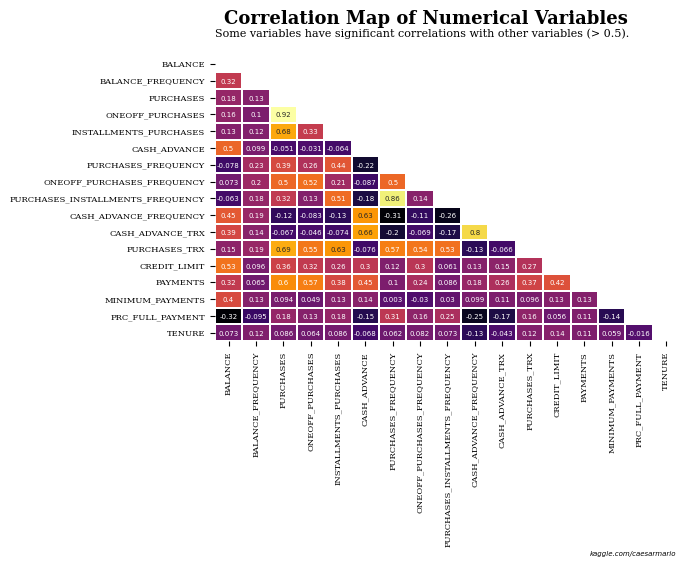

In [19]:
# --- Correlation Map (Heatmap) ---
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # Select only numeric columns
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(numeric_df.corr(), mask=mask, annot=True, cmap='inferno', linewidths=0.1, cbar=False, annot_kws={"size":5})
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, size=6, fontfamily='serif')
ax.set_yticklabels(ylabels, size=6, fontfamily='serif')
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', x=0.327, y=0.96, ha='left', fontsize=13, fontfamily='serif')
plt.title('Some variables have significant correlations with other variables (> 0.5).\n', fontsize=8, fontfamily='serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.gcf().text(0.85, 0.05, 'kaggle.com/caesarmario', style='italic', fontsize=5)
plt.show()

## Another way to read the data

In [20]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [21]:
df[['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']].nunique().sort_values(ascending=True)

TENURE                                 7
BALANCE_FREQUENCY                     43
PURCHASES_INSTALLMENTS_FREQUENCY      47
PRC_FULL_PAYMENT                      47
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
ONEOFF_PURCHASES                    4014
CASH_ADVANCE                        4323
INSTALLMENTS_PURCHASES              4452
PURCHASES                           6203
MINIMUM_PAYMENTS                    8636
PAYMENTS                            8711
BALANCE                             8871
CUST_ID                             8950
dtype: int64

In [22]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [23]:
import warnings
warnings.filterwarnings("ignore")

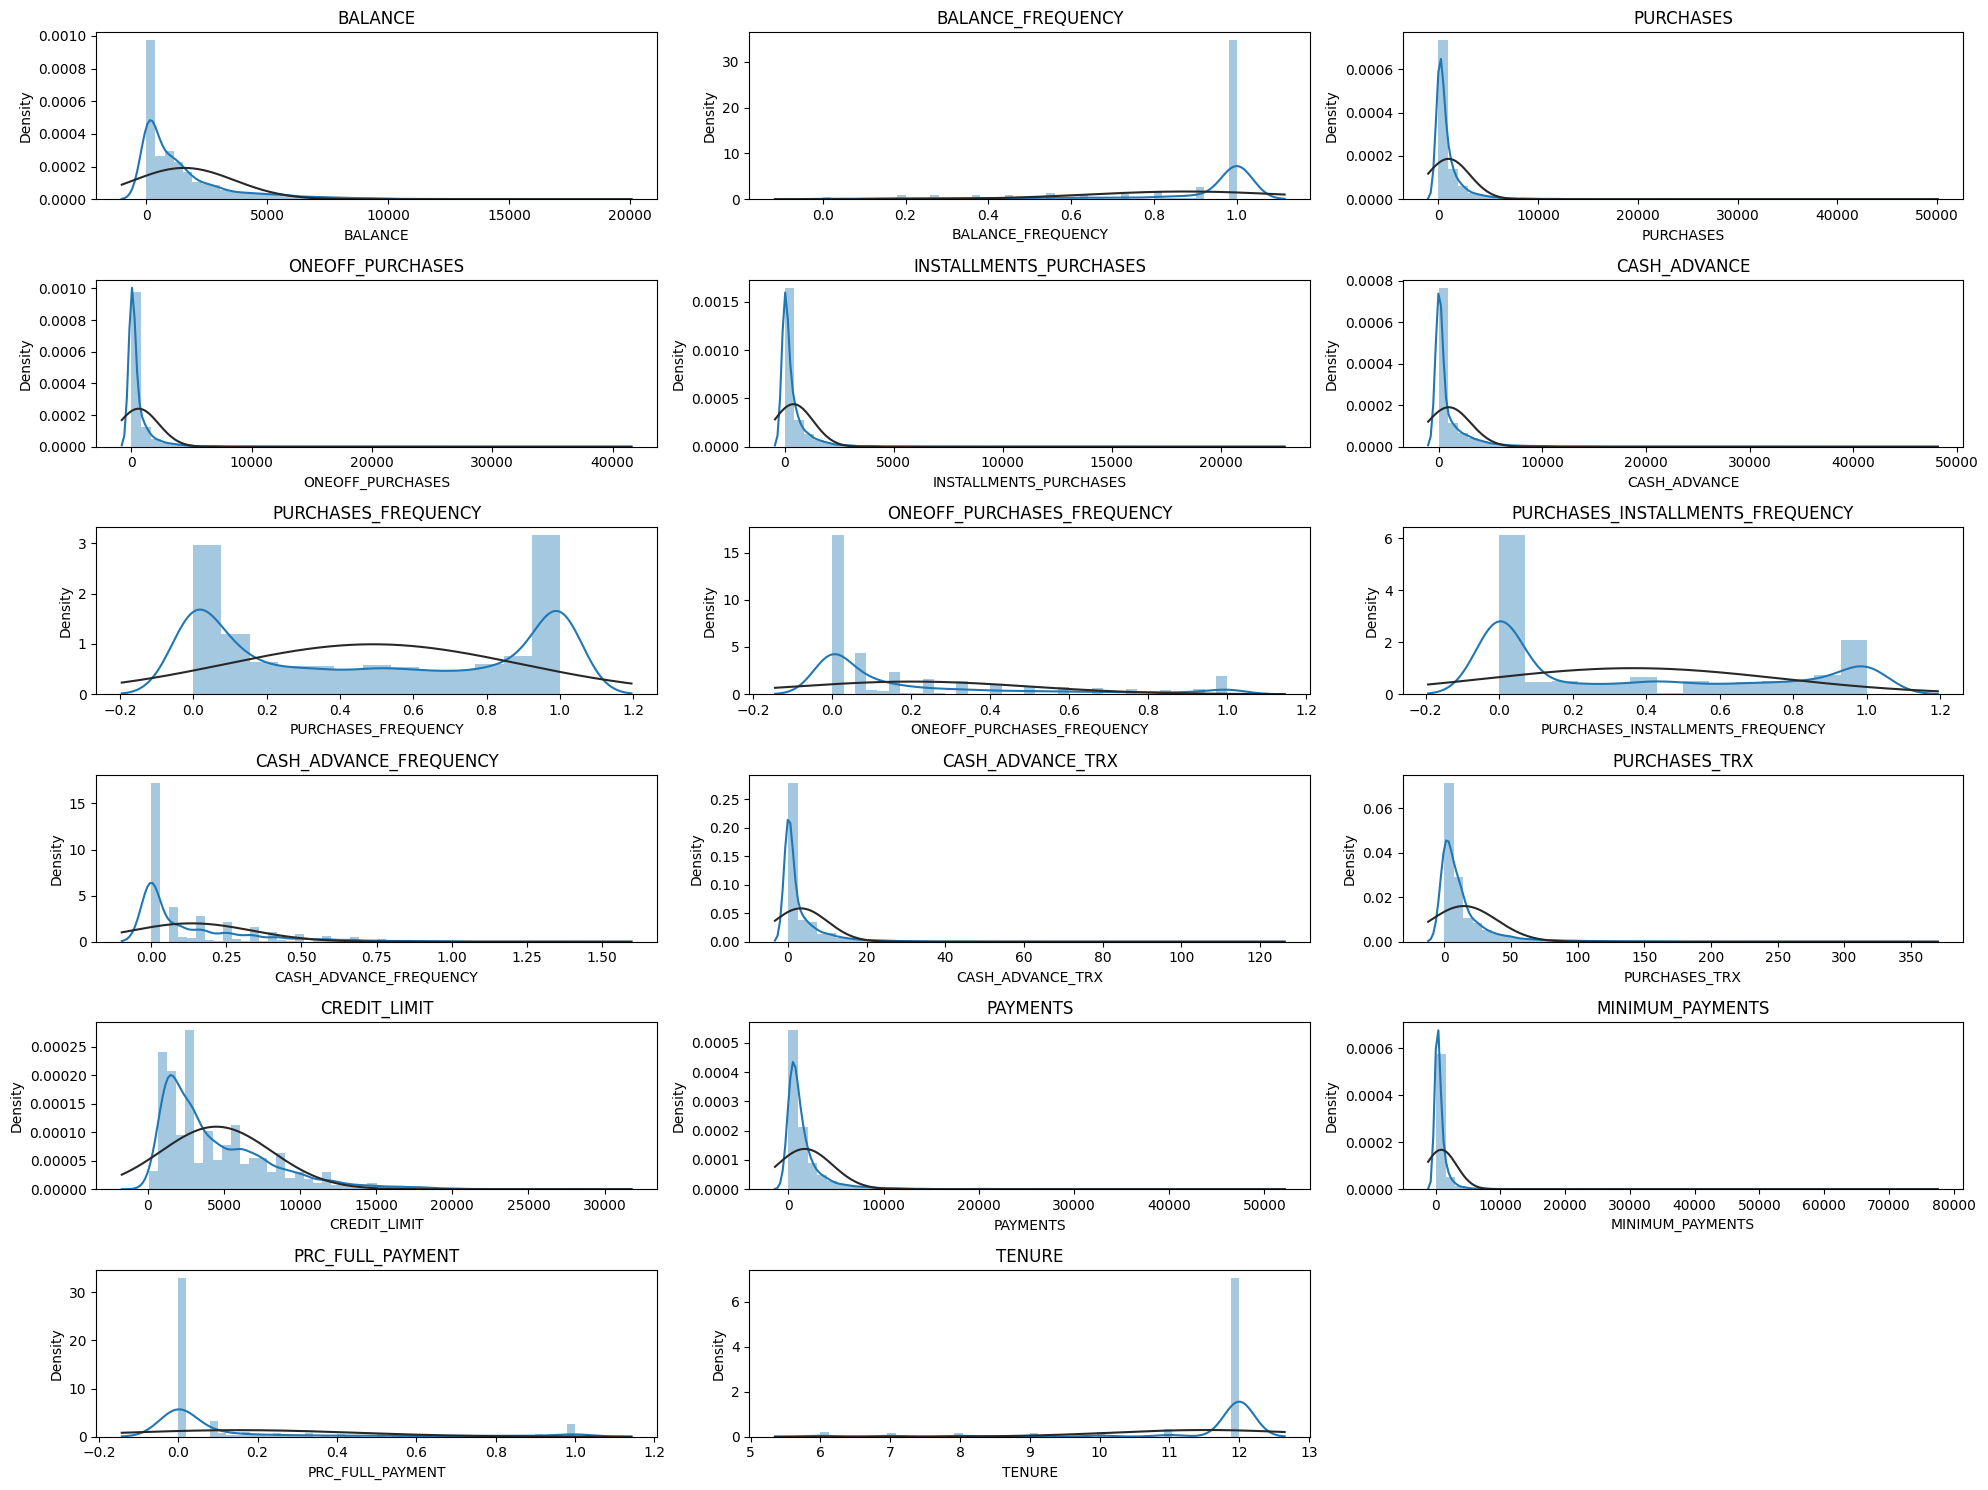

In [24]:
from scipy.stats import norm

variable_graph = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

plt.figure(figsize=(20,15))

for i in range(0,17):
    plt.subplot(6,3, i+1)
    sns.distplot(df[variable_graph[i]].dropna(),fit=norm)
    plt.title(variable_graph[i])

plt.tight_layout()

## Early conclusion

- Terdapat **missing values** dalam **minimum_payments.**
- Beberapa kolom banyak terdapat nilai 0, distribusinya right skewed yang dapat dilihat dari grafik.

- Dari heatmap, dapat dilihat korelasi terbesar di dapatkan oleh **purchases dan one off purchases**, korelasi yang tergolong besar lainnya antara **purchases frequency dan purcahses installments frequency**.

- Untuk tenure, mayoritas user memilih 12 bulan. nasabah lebih cenderung membayar kembali kreditnya dalam jangka panjang dengan konsekuensi tingkat suku bunga yang lebih tinggi.

- Pada variabel **purchases** banyak terdapat nilai 0 pada pengguna nasabah. Dapat diasumsikan bahwa beberapa nasabah sengaja menjaga saldo akunnya tetap rendah untuk mendapatkan batas kredit yang tinggi, yang berdampak pada peningkatan rasio pemanfaatan kredit dan skor kredit. 

- **Balance_Frequency** nilai mayoritas nya adalah satu, yang menjadi indikasi bahwa nasabah sering menggunakan kartu kredit. 

**Zero Balance Card**

[reference](https://www.investopedia.com/terms/z/zero-balance-card.asp)

The term "zero balance card" refers to a credit card with no outstanding balance of debt. Credit card users can maintain zero balance cards in two ways:

1. **Full Payment:** Users can achieve a zero balance by paying off their full credit card balances at the end of each billing cycle.

2. **Non-Usage:** Alternatively, they can maintain a zero balance by simply not using their credit cards.

Maintaining zero balance cards can offer several advantages for credit card users, including:

- **Improved Credit Score:** It can help improve their credit score over time.


## **EDA**

In [25]:
scatter_style = {
    'linewidth': 0.8,
    'edgecolor': '#1976D2',  # Royal Blue
    'alpha': 0.7
}

sub_scatter_style_color = {
    's': 6,
    'alpha': 0.7,
    'linewidth': 0.2,
    'zorder': 10,
    'edgecolor': '#1976D2'  # Royal Blue
}

sub_scatter_style_grey = {
    's': 6,
    'alpha': 0.4,
    'linewidth': 0.8,
    'zorder': 5,
    'color': '#B0BEC5'  # Blue Grey
}

grid_style = {
    'alpha': 0.4,
    'color': '#B0BEC5',  # Blue Grey
    'linestyle': 'dotted',
    'zorder': 1
}

xy_label = {
    'fontweight': 'bold',
    'fontsize': 14,
    'fontfamily': 'sans-serif'  # Sans-serif
}

suptitle = {
    'fontsize': 24,
    'fontweight': 'bold',
    'fontfamily': 'serif'  # Serif
}

title = {
    'fontsize': 18,
    'fontfamily': 'sans-serif'  # Sans-serif
}

color_palette = [
    '#1976D2',  # Royal Blue
    '#F57C00',  # Amber
    '#388E3C',  # Green
    '#E53935',  # Red
    '#7E57C2',  # Purple
    '#FFC107',  # Yellow
    '#546E7A'   # Blue Grey
]

sub_axes = [None] * 7


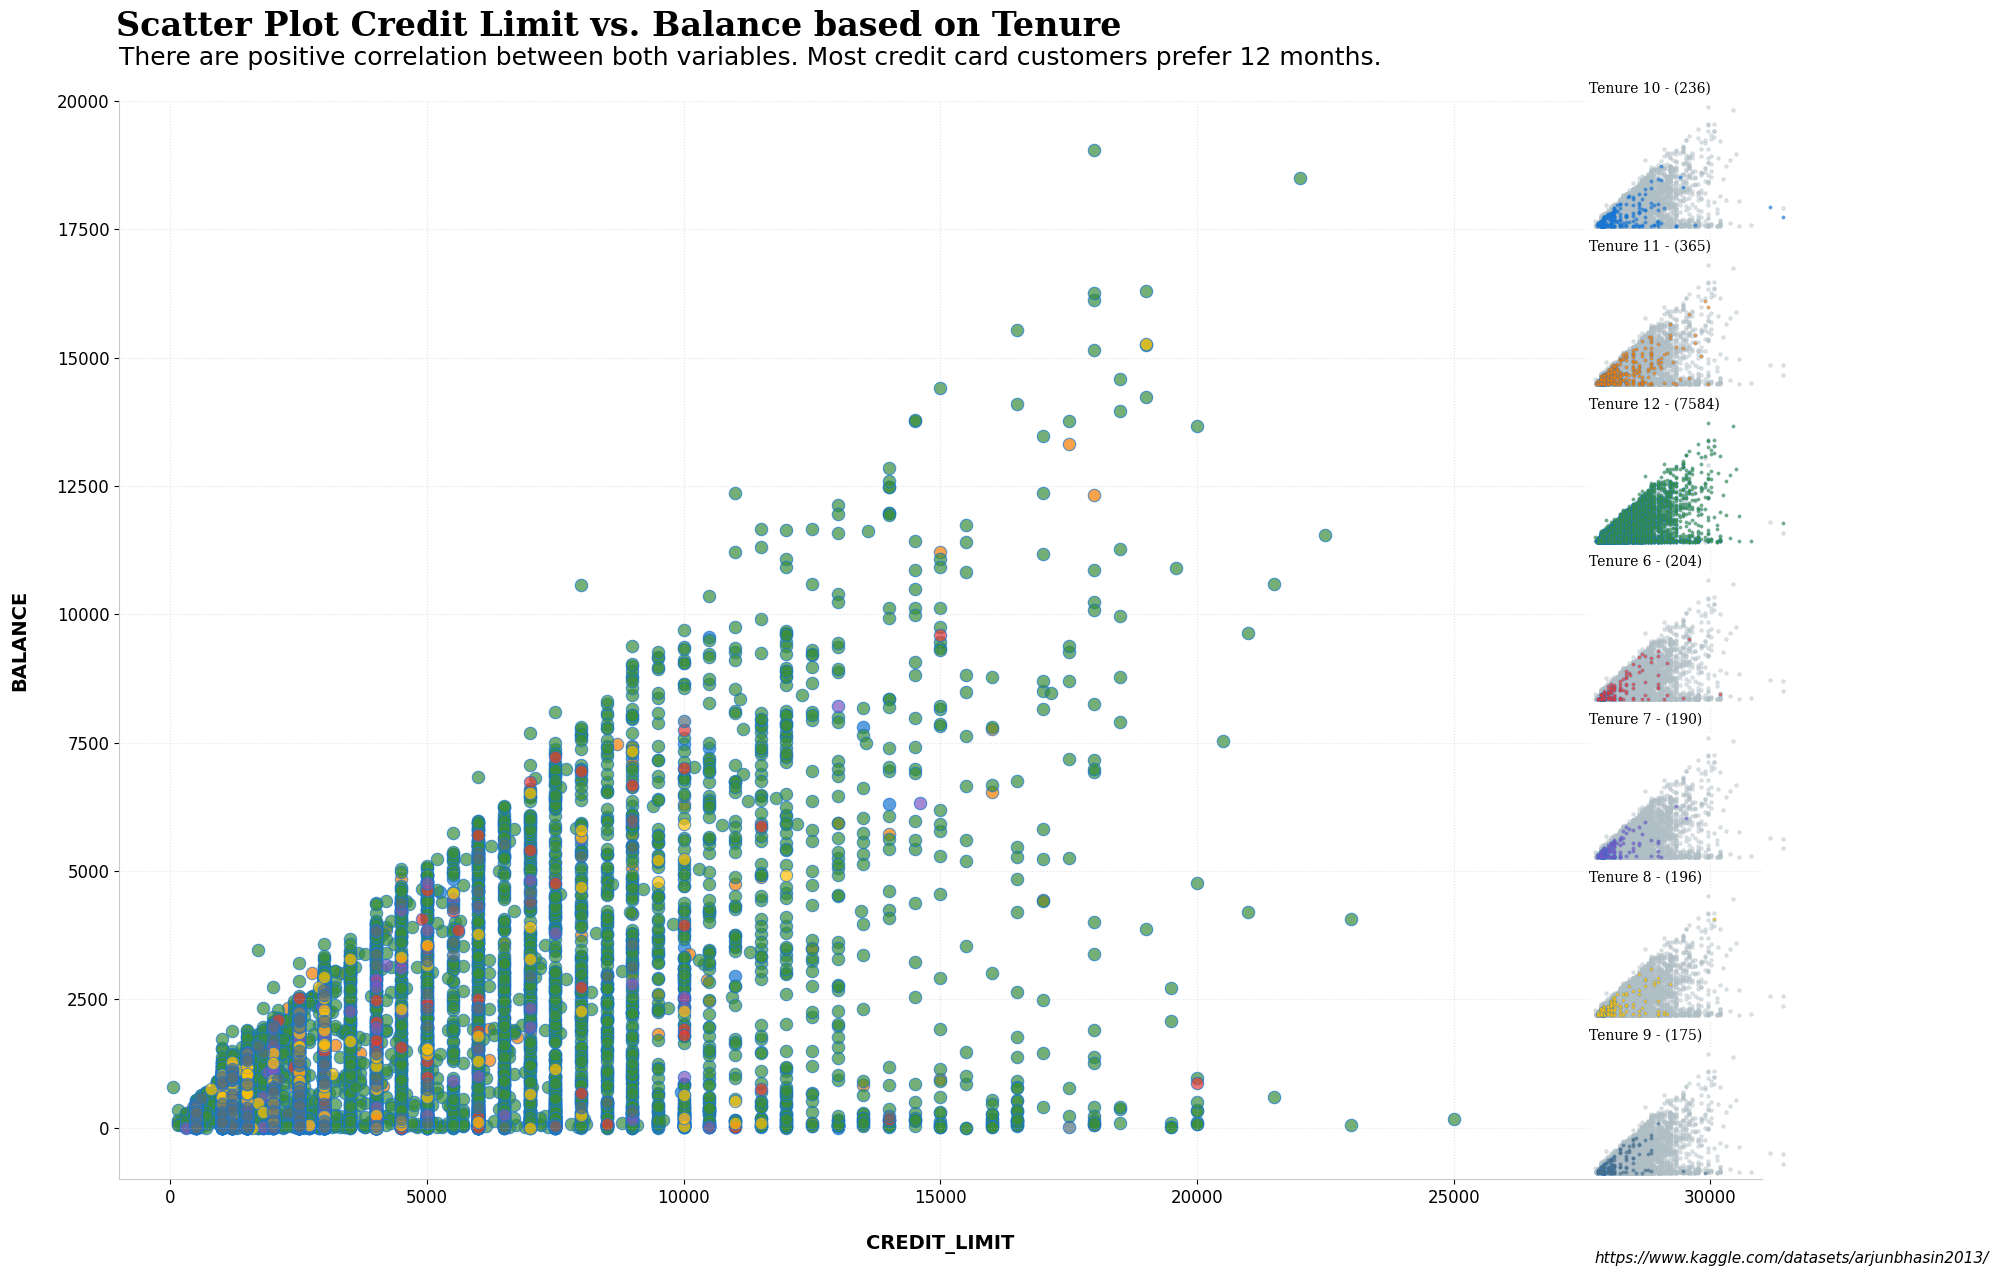

In [26]:
 # DataFrame init
eda = df[['CREDIT_LIMIT','BALANCE','TENURE']]
eda['TENURE'] = eda['TENURE'].astype(str)
tenure = sorted(eda['TENURE'].unique())

# Plot size settings
fig = plt.figure(figsize=(22,14))
gs = fig.add_gridspec(7,7)
ax = fig.add_subplot(gs[:,:7])
ax.set_aspect(1)

# Main Plot
for x in range(len(tenure)):
    eda_x = eda[eda['TENURE']==tenure[x]]
    ax.scatter(eda_x['CREDIT_LIMIT'], eda_x['BALANCE'], s=80, color= color_palette[x], **scatter_style)
    ax.set_title('There are positive correlation between both variables. Most credit card customers prefer 12 months.\n', loc='left', **title)
    ax.set_xlabel('\nCREDIT_LIMIT', **xy_label)
    ax.set_ylabel('BALANCE\n', **xy_label)
    ax.grid(axis='y', which='major', **grid_style)
    ax.grid(axis='x', which='major', **grid_style)
    for spine in ax.spines.values():
        spine.set_color('None')
    for spine in ['bottom','left']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('#CAC9CD')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

# Sub Plot
for idx, tnr in enumerate(tenure):
    sub_axes[idx] = fig.add_subplot(gs[idx,6], aspect=1)
    sub_axes[idx].scatter(eda[eda['TENURE']!=tnr]['CREDIT_LIMIT'], eda[eda['TENURE']!=tnr]['BALANCE'], label=tnr, **sub_scatter_style_grey)
    sub_axes[idx].scatter(eda[eda['TENURE']==tnr]['CREDIT_LIMIT'], eda[eda['TENURE']==tnr]['BALANCE'], color=color_palette[idx], label=tnr, **sub_scatter_style_color)
    cnt = (eda['TENURE']==tnr).sum()
    sub_axes[idx].set_title(f'Tenure {tnr} - ({cnt})', loc='left', fontsize=10, fontfamily='serif')
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    for spine in sub_axes[idx].spines.values():
        spine.set_color('None')

for axes in [ax] + sub_axes:
    axes.set_xlim(-1000, 31000)
    axes.set_ylim(-1000, 20000)

# --- EDA 1 Title ---
plt.suptitle('Scatter Plot Credit Limit vs. Balance based on Tenure', x=0.138, y=0.945, ha='left', **suptitle)
plt.gcf().text(0.81, 0.05, 'https://www.kaggle.com/datasets/arjunbhasin2013/', style='italic', fontsize=11)
plt.show()





In [27]:
title = {
    'fontsize': 12,
    'fontfamily': 'serif',
    'style': 'italic',
    'weight': 'bold',
    'ha': 'center'
}

grid_style = {
    'alpha': 0.6,
    'color': '#9B9A9C',
    'linestyle': 'dotted',
    'zorder': 1
}

sct_style = {
    's': 200,
    'linewidth': 2
}

xy_label = {
    'fontweight': 'bold',
    'fontsize': 9,
    'fontfamily': 'serif'
}

ann_style = {
    'xytext': (0, 0),
    'textcoords': 'offset points',
    'va': 'center',
    'ha': 'center',
    'style': 'italic',
    'fontfamily': 'serif'
}

tenure = sorted(df['TENURE'].unique())

color_palette = [
    '#2D0F51',  # Dark Purple
    '#FF9A00',  # Orange
    '#6600A5',  # Deep Purple
    '#FFD61E',  # Yellow
    '#722E9A',  # Violet
    '#FFE863',  # Pale Yellow
    '#A486D5'   # Lavender
]


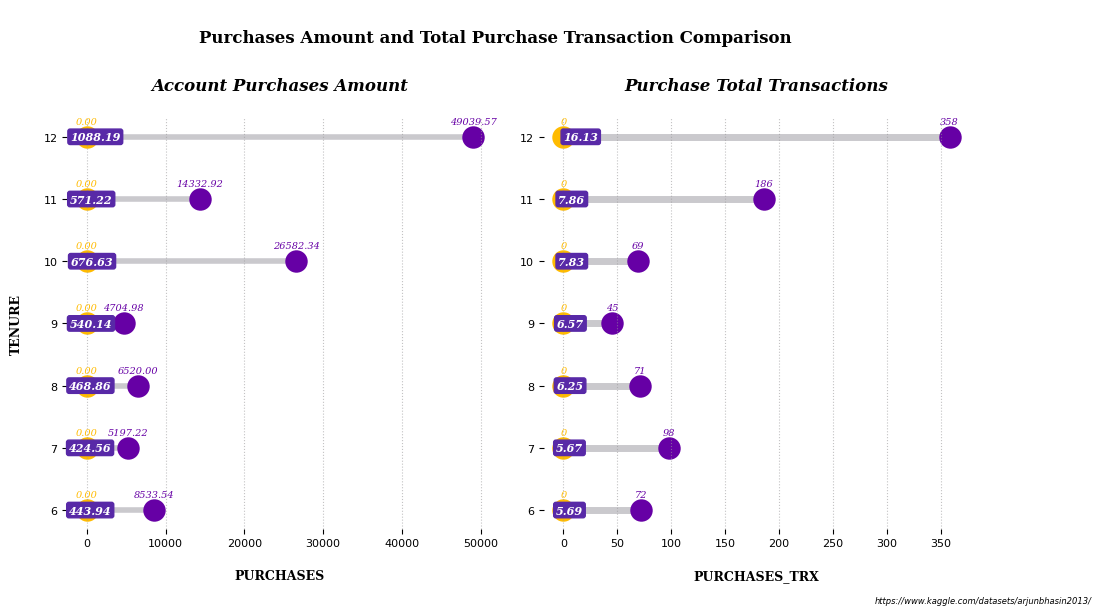

In [28]:
# DataFrame 1 init
eda2 = df[['PURCHASES','TENURE']]
eda2 = eda2.groupby('TENURE').agg(MIN=('PURCHASES','min'), AVG=('PURCHASES','mean'), MAX=('PURCHASES','max')).reset_index()

# DataFrame 2 init
eda3 = df[['PURCHASES_TRX','TENURE']]
eda3 = eda3.groupby('TENURE').agg(MIN=('PURCHASES_TRX','min'), AVG=('PURCHASES_TRX','mean'), MAX=('PURCHASES_TRX','max')).reset_index()

# Plotsize settings
fig = plt.figure(figsize=(10,6))
plt.suptitle('\nPurchases Amount and Total Purchase Transaction Comparison', fontweight='heavy', fontsize=12, fontfamily='serif')

plt.subplot(1, 2, 1)
plt.tight_layout(rect=[0, 0, 1, 1.01])
axs_left=plt.gca()
min_sct = plt.scatter(x=eda2['MIN'], y=eda2['TENURE'], c='#FFBB00', **sct_style)
max_sct = plt.scatter(x=eda2['MAX'], y=eda2['TENURE'], c='#6600A5', **sct_style)
for i in range(len(tenure)):
    eda2_1_x = eda2[eda2['TENURE']==tenure[i]]
    plt.hlines(y=eda2_1_x['TENURE'], xmin=eda2_1_x['MIN'], xmax=eda2_1_x['MAX'], linewidth=4, color='#CAC9CD', zorder=0)
    plt.annotate('{0:.2f}'.format(eda2_1_x['MIN'].values[0]), xy=(eda2_1_x['MIN'].values[0], eda2_1_x['TENURE'].values[0]+0.25), color='#FFBB00', fontsize=7, **ann_style)
    plt.annotate('{0:.2f}'.format(eda2_1_x['AVG'].values[0]), xy=(eda2_1_x['AVG'].values[0], eda2_1_x['TENURE'].values[0]), color='w', fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', pad=0.2, color='#5829A7'), **ann_style)
    plt.annotate('{0:.2f}'.format(eda2_1_x['MAX'].values[0]), xy=(eda2_1_x['MAX'].values[0], eda2_1_x['TENURE'].values[0]+0.25), color='#6600A5', fontsize=7, **ann_style)
for spine in axs_left.spines.values():
    spine.set_color('None')
plt.xlabel('\nPURCHASES', **xy_label)
plt.ylabel('TENURE\n', **xy_label)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major', **grid_style)
plt.title('\nAccount Purchases Amount\n', **title)


plt.subplot(1, 2, 2)
plt.tight_layout(rect=[0, 0, 1, 1.01])
axs_right=plt.gca()
min_sctt = plt.scatter(x=eda3['MIN'], y=eda3['TENURE'], c='#FFBB00', **sct_style)
max_sctt = plt.scatter(x=eda3['MAX'], y=eda3['TENURE'], c='#6600A5', **sct_style)
for i in range(len(tenure)):
    eda2_2_x = eda3[eda3['TENURE']==tenure[i]]
    plt.hlines(y=eda2_2_x['TENURE'], xmin=eda2_2_x['MIN'], xmax=eda2_2_x['MAX'], linewidth=5, color='#CAC9CD', zorder=0)
    plt.annotate('{:.0f}'.format(eda2_2_x['MIN'].values[0]), xy=(eda2_2_x['MIN'].values[0], eda2_2_x['TENURE'].values[0]+0.25), color='#FFBB00', fontsize=7, **ann_style)
    plt.annotate('{0:.2f}'.format(eda2_2_x['AVG'].values[0]), xy=(eda2_2_x['AVG'].values[0], eda2_2_x['TENURE'].values[0]), color='w', fontsize=8, fontweight='bold', bbox=dict(boxstyle='round', pad=0.2, color='#5829A7'), **ann_style)
    plt.annotate('{:.0f}'.format(eda2_2_x['MAX'].values[0]), xy=(eda2_2_x['MAX'].values[0], eda2_2_x['TENURE'].values[0]+0.25), color='#6600A5', fontsize=7, **ann_style)
for spine in axs_right.spines.values():
    spine.set_color('None')
plt.xlabel('\nPURCHASES_TRX', **xy_label)
plt.ylabel('')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major', **grid_style)
plt.title('\nPurchase Total Transactions\n', **title)

plt.gcf().text(0.88, -0.01, 'https://www.kaggle.com/datasets/arjunbhasin2013/', style='italic', fontsize=6)
plt.show();


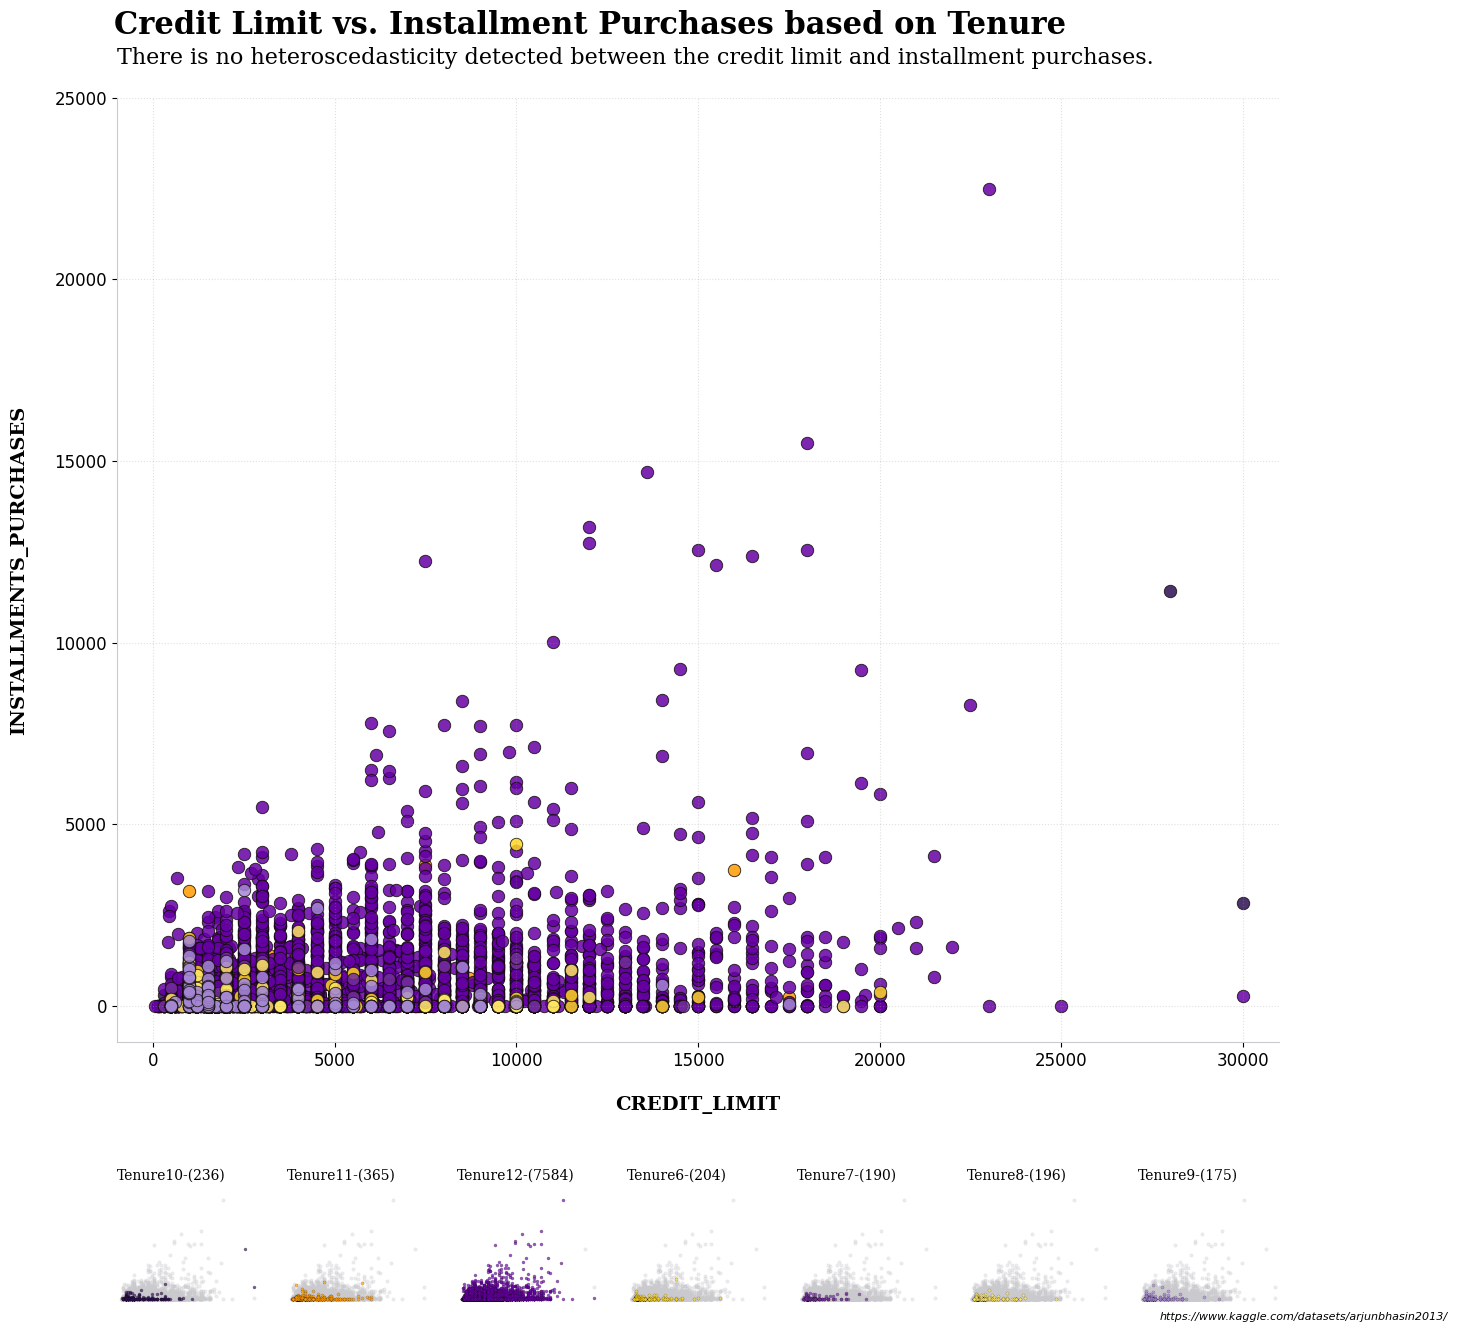

In [30]:
scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
sub_scatter_style_color=dict(s=5, alpha=0.65, linewidth=0.15, zorder=10, edgecolor='#100C07')
sub_scatter_style_grey=dict(s=5, alpha=0.3, linewidth=0.7, zorder=5, color='#CAC9CD')
grid_style=dict(alpha=0.3, color='#9B9A9C', linestyle='dotted', zorder=1)
xy_label=dict(fontweight='bold', fontsize=14, fontfamily='serif')
suptitle=dict(fontsize=22, fontweight='heavy', fontfamily='serif')
title=dict(fontsize=16, fontfamily='serif')
color_pallete=['#2D0F51', '#FF9A00', '#6600A5', '#FFD61E', '#722E9A', '#FFE863', '#A486D5']
sub_axes=[None] * 7

eda4 = df[['CREDIT_LIMIT','INSTALLMENTS_PURCHASES','TENURE']]
eda4['TENURE'] = eda['TENURE'].astype(str)
tenure = sorted(eda['TENURE'].unique())

fig = plt.figure(figsize=(15,20))
gs = fig.add_gridspec(7,7)
ax = fig.add_subplot(gs[:7,:])
ax.set_aspect(1)

for x in range(len(tenure)):
    eda4_x = eda4[eda4['TENURE']==tenure[x]]
    ax.scatter(eda4_x['CREDIT_LIMIT'], eda4_x['INSTALLMENTS_PURCHASES'], s=80, color=color_palette[x], **scatter_style)
    ax.set_title('There is no heteroscedasticity detected between the credit limit and installment purchases.\n', loc='left', **title)
    ax.set_xlabel('\nCREDIT_LIMIT', **xy_label)
    ax.set_ylabel('INSTALLMENTS_PURCHASES\n', **xy_label)
    ax.grid(axis='y', which='major', **grid_style)
    ax.grid(axis='x', which='major', **grid_style)
    for spine in ax.spines.values():
        spine.set_color('None')
    for spine in ['bottom','left']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('#CAC9CD')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

for idx, tnr in enumerate(tenure):
    sub_axes[idx] = fig.add_subplot(gs[6,idx],aspect=1)
    sub_axes[idx].scatter(eda4[eda4['TENURE']!=tnr]['CREDIT_LIMIT'], eda4[eda4['TENURE']!=tnr]['INSTALLMENTS_PURCHASES'], label=tnr, **sub_scatter_style_grey)
    sub_axes[idx].scatter(eda4[eda4['TENURE']==tnr]['CREDIT_LIMIT'], eda4[eda4['TENURE']==tnr]['INSTALLMENTS_PURCHASES'], color=color_palette[idx], label=tnr, **sub_scatter_style_color)

    cnt = (eda4['TENURE']==tnr).sum()
    sub_axes[idx].set_title(f'Tenure{tnr}-({cnt})', loc='left', fontsize=10,fontfamily='serif')
    sub_axes[idx].set_xticks([])
    sub_axes[idx].set_yticks([])
    for spine in sub_axes[idx].spines.values():
        spine.set_color('None')

for axes in [ax] + sub_axes:
    axes.set_xlim(-1000, 31000)
    axes.set_ylim(-1000, 25000)

plt.suptitle('Credit Limit vs. Installment Purchases based on Tenure', x=0.123, y=0.775, ha='left', **suptitle)
plt.gcf().text(0.82, 0.12, 'https://www.kaggle.com/datasets/arjunbhasin2013/', style='italic', fontsize=8)
plt.show();



The scatter plot shows no correlation between both variables since the scatter plot shows a random pattern.

## **Preprocessing**

In [47]:
# Dropping cust_id because it has nothing to do for our improvements a.k.a object
new_df = df.drop(['CUST_ID'], axis=1)
new_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

### **Handle Missing Values**

Terdapat dua data yang memiliki missing values yaitu minimum payments dan credit limit, akan dicoba pendekatan mengisi missing values tersebut dengan nilai mean dari data yang ada. Dikarenakan kedua variabel tersebut merupakan numerical dan juga rationya cocok untuk dilakukan imputasi

In [48]:
new_df.isnull().sum().sort_values(ascending=False)


MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

In [44]:
new_df['MINIMUM_PAYMENTS']

0        139.509787
1       1072.340217
2        627.284787
3               NaN
4        244.791237
           ...     
8945      48.886365
8946            NaN
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64

In [45]:
new_df['MINIMUM_PAYMENTS'].fillna((new_df['MINIMUM_PAYMENTS'].mean()),inplace=True)
new_df['CREDIT_LIMIT'].fillna((new_df['CREDIT_LIMIT'].mean()),inplace=True)

In [54]:
from sklearn.impute import KNNImputer

null_columns = df.columns[df.isnull().any()].tolist()

imputer = KNNImputer()
df_imp = pd.DataFrame(imputer.fit_transform(new_df[null_columns]),columns=null_columns)
new_df = new_df.fillna(df_imp)

new_df.head()


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000       1215.951453          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [55]:
new_df.isnull().sum().sort_values(ascending=True)

BALANCE                             0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
TENURE                              0
dtype: int64

### **Scalling**

Scalling digunakan untuk mengatasi masalah standarisasi dari variabel yang bermacam-macam skalanya.

In [59]:
from sklearn.preprocessing import StandardScaler

X = pd.DataFrame(StandardScaler().fit_transform(new_df))

In [63]:
from sklearn.neighbors import NearestNeighbors
from numpy.random import uniform
from random import sample
from math import isnan

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 600
sns.set(rc = {'axes.facecolor': '#FBFBFB', 'figure.facecolor': '#FBFBFB'})
class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    end = '\033[0m'



# --- Hopkins Test (codes by Matevž Kunaver) ---
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

# --- Perform Hopkins Test ---
hopkins_value = hopkins(X)
hopkins_result = 'Result: '+clr.start+'{:.4f}'.format(hopkins_value)+clr.end
print(clr.start+'.: Hopkins Test :.'+clr.end)
print(clr.color+'*' * 19+clr.end)
print(hopkins_result)
if  0.7 < hopkins_value < 0.99:
    print('>> From the result above,'+clr.color+' it has a high tendency to cluster (contains meaningful clusters)'+clr.end)
    print('\n'+clr.color+'*' * 31+clr.end)
    print(clr.start+'.:. Conclusions: Accept H0 .:.'+clr.end)
    print(clr.color+'*' * 31+clr.end)
else:
    print('>> From the result above,'+clr.color+' it has no meaningful clusters'+clr.end)
    print('\n'+clr.color+'*' * 31+clr.end)
    print(clr.start+'.:. Conclusions: Reject H0 .:.'+clr.end)
    print(clr.color+'*' * 31+clr.end)

.: Hopkins Test :.
*******************
Result: 0.9670
>> From the result above, it has a high tendency to cluster (contains meaningful clusters)

*******************************
.:. Conclusions: Accept H0 .:.
*******************************


### **PCA**

 By using PCA before applying clustering algorithm, it allows to **reduces dimensions**, **data noise**, and **decrease computation cost.** In this notebook, the number of features will be reduced to 2 dimensions so that the clustering results can be visualized.

In [65]:
from sklearn.decomposition import PCA

# transform into array
X = np.asarray(X)

# apply PCA
pca = PCA(n_components=2, random_state=42)
X = pca.fit_transform(X)

            

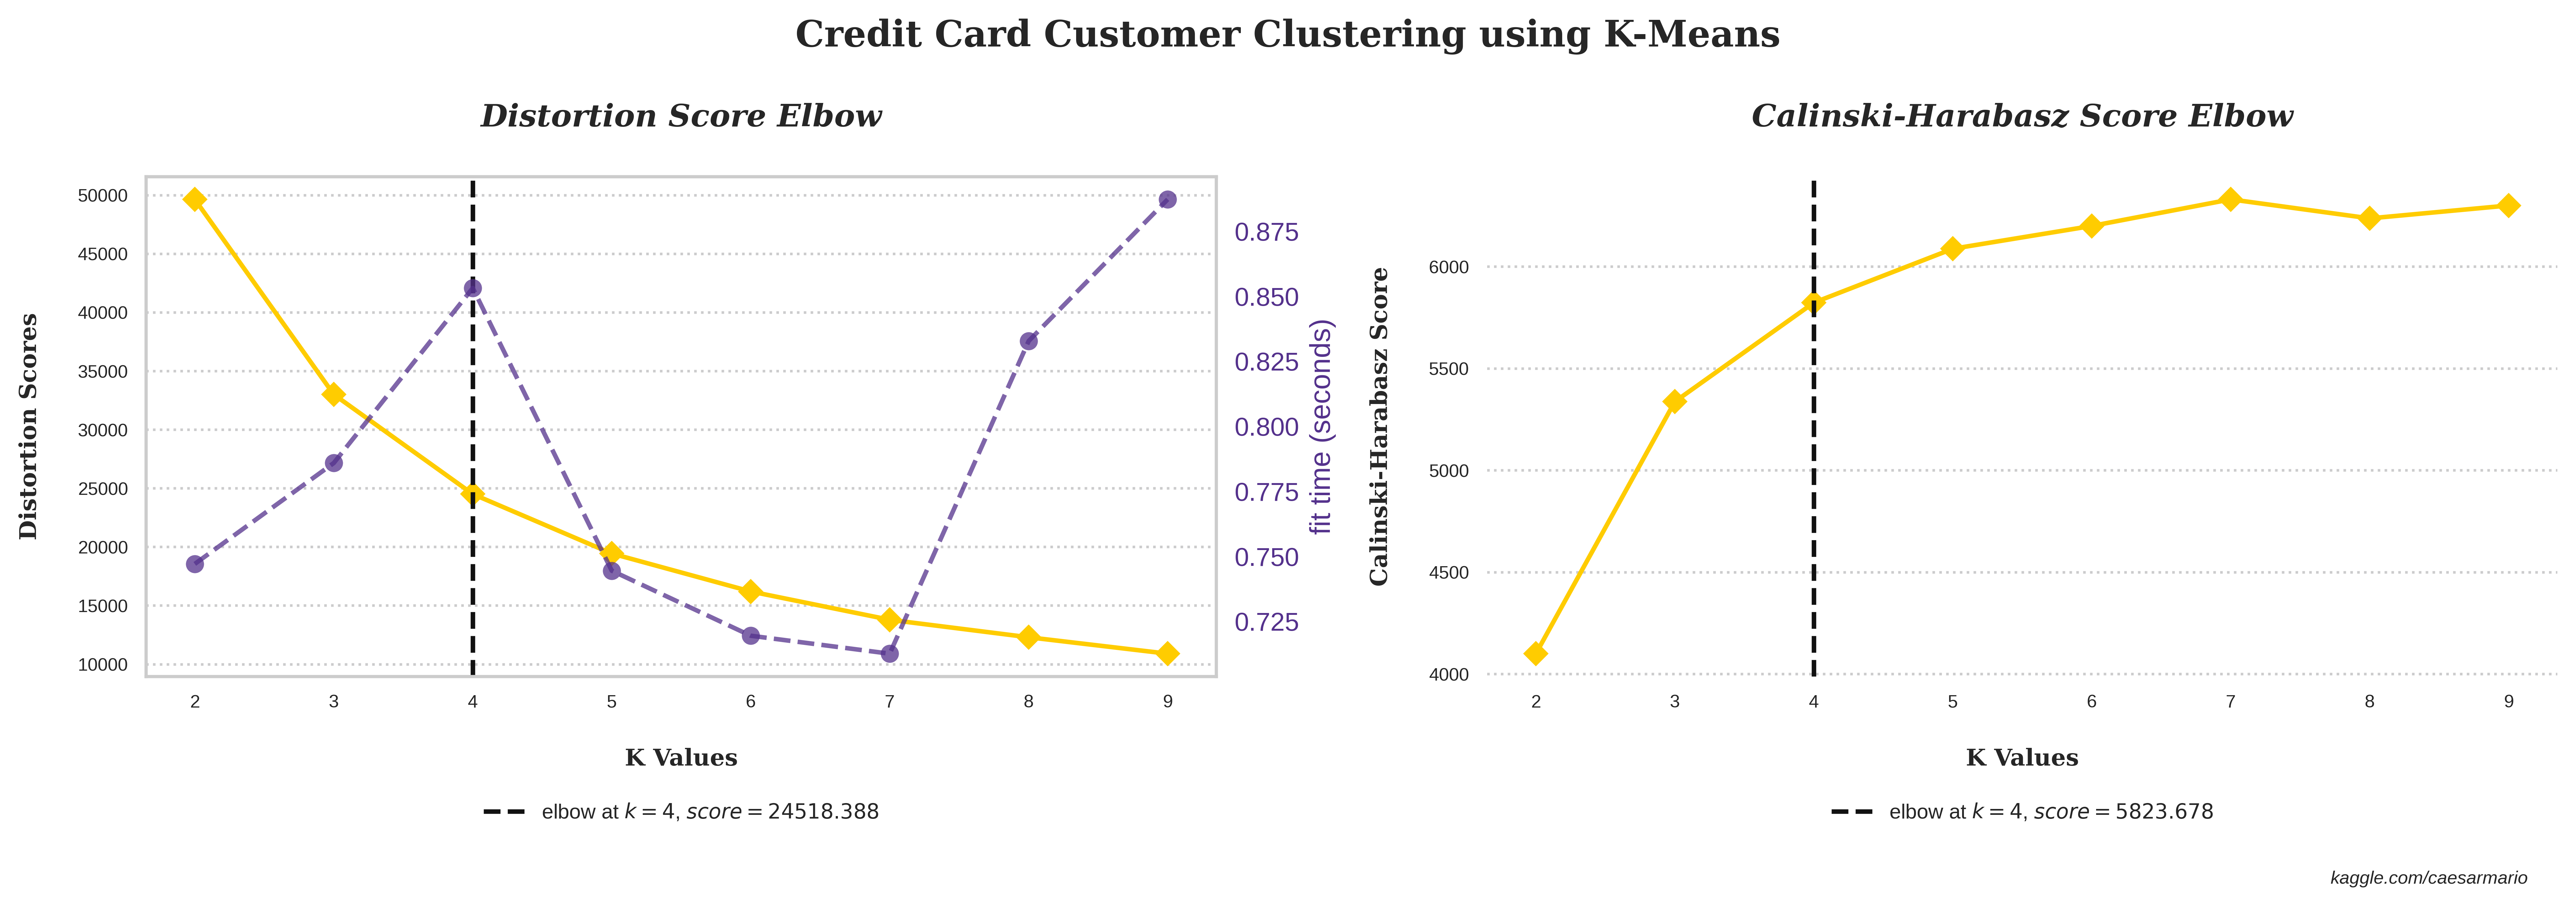

In [70]:
from yellowbrick.style import set_palette
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

def kmeans():
    
    # --- Figures Settings ---
    color_palette=['#FFCC00', '#54318C']
    set_palette(color_palette)
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style=dict(fontweight='bold', fontfamily='serif')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # --- Elbow Score ---
    elbow_score = KElbowVisualizer(KMeans(random_state=32, max_iter=500), k=(2, 10), ax=ax1)
    elbow_score.fit(X)
    elbow_score.finalize()
    elbow_score.ax.set_title('Distortion Score Elbow\n', **title)
    elbow_score.ax.tick_params(labelsize=7)
    for text in elbow_score.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in elbow_score.ax.spines.values():
        spine.set_color('None')
    elbow_score.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score.ax.grid(axis='x', alpha=0)
    elbow_score.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score.ax.set_ylabel('Distortion Scores\n', fontsize=9, **text_style)
    
    # --- Elbow Score (Calinski-Harabasz Index) ---
    elbow_score_ch = KElbowVisualizer(KMeans(random_state=32, max_iter=500), k=(2, 10), metric='calinski_harabasz', timings=False, ax=ax2)
    elbow_score_ch.fit(X)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
    elbow_score_ch.ax.tick_params(labelsize=7)
    for text in elbow_score_ch.ax.legend_.texts:
        text.set_fontsize(9)
    for spine in elbow_score_ch.ax.spines.values():
        spine.set_color('None')
    elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    elbow_score_ch.ax.grid(axis='x', alpha=0)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)
    
    plt.suptitle('Credit Card Customer Clustering using K-Means', fontsize=14, **text_style)
    plt.gcf().text(0.9, 0.05, 'kaggle.com/caesarmario', style='italic', fontsize=7)
    plt.tight_layout()
    plt.show()

# --- Calling K-Means Functions ---
kmeans()


Based on the results of the elbow method and Calinski Harabasz score above, it can be concluded that the best clustering number for the K-Means algorithm is **4 clusters**. The following steps will apply the number of optimal clusters, visualize clusters distribution plot, and silhouette plots to evaluate their performance.

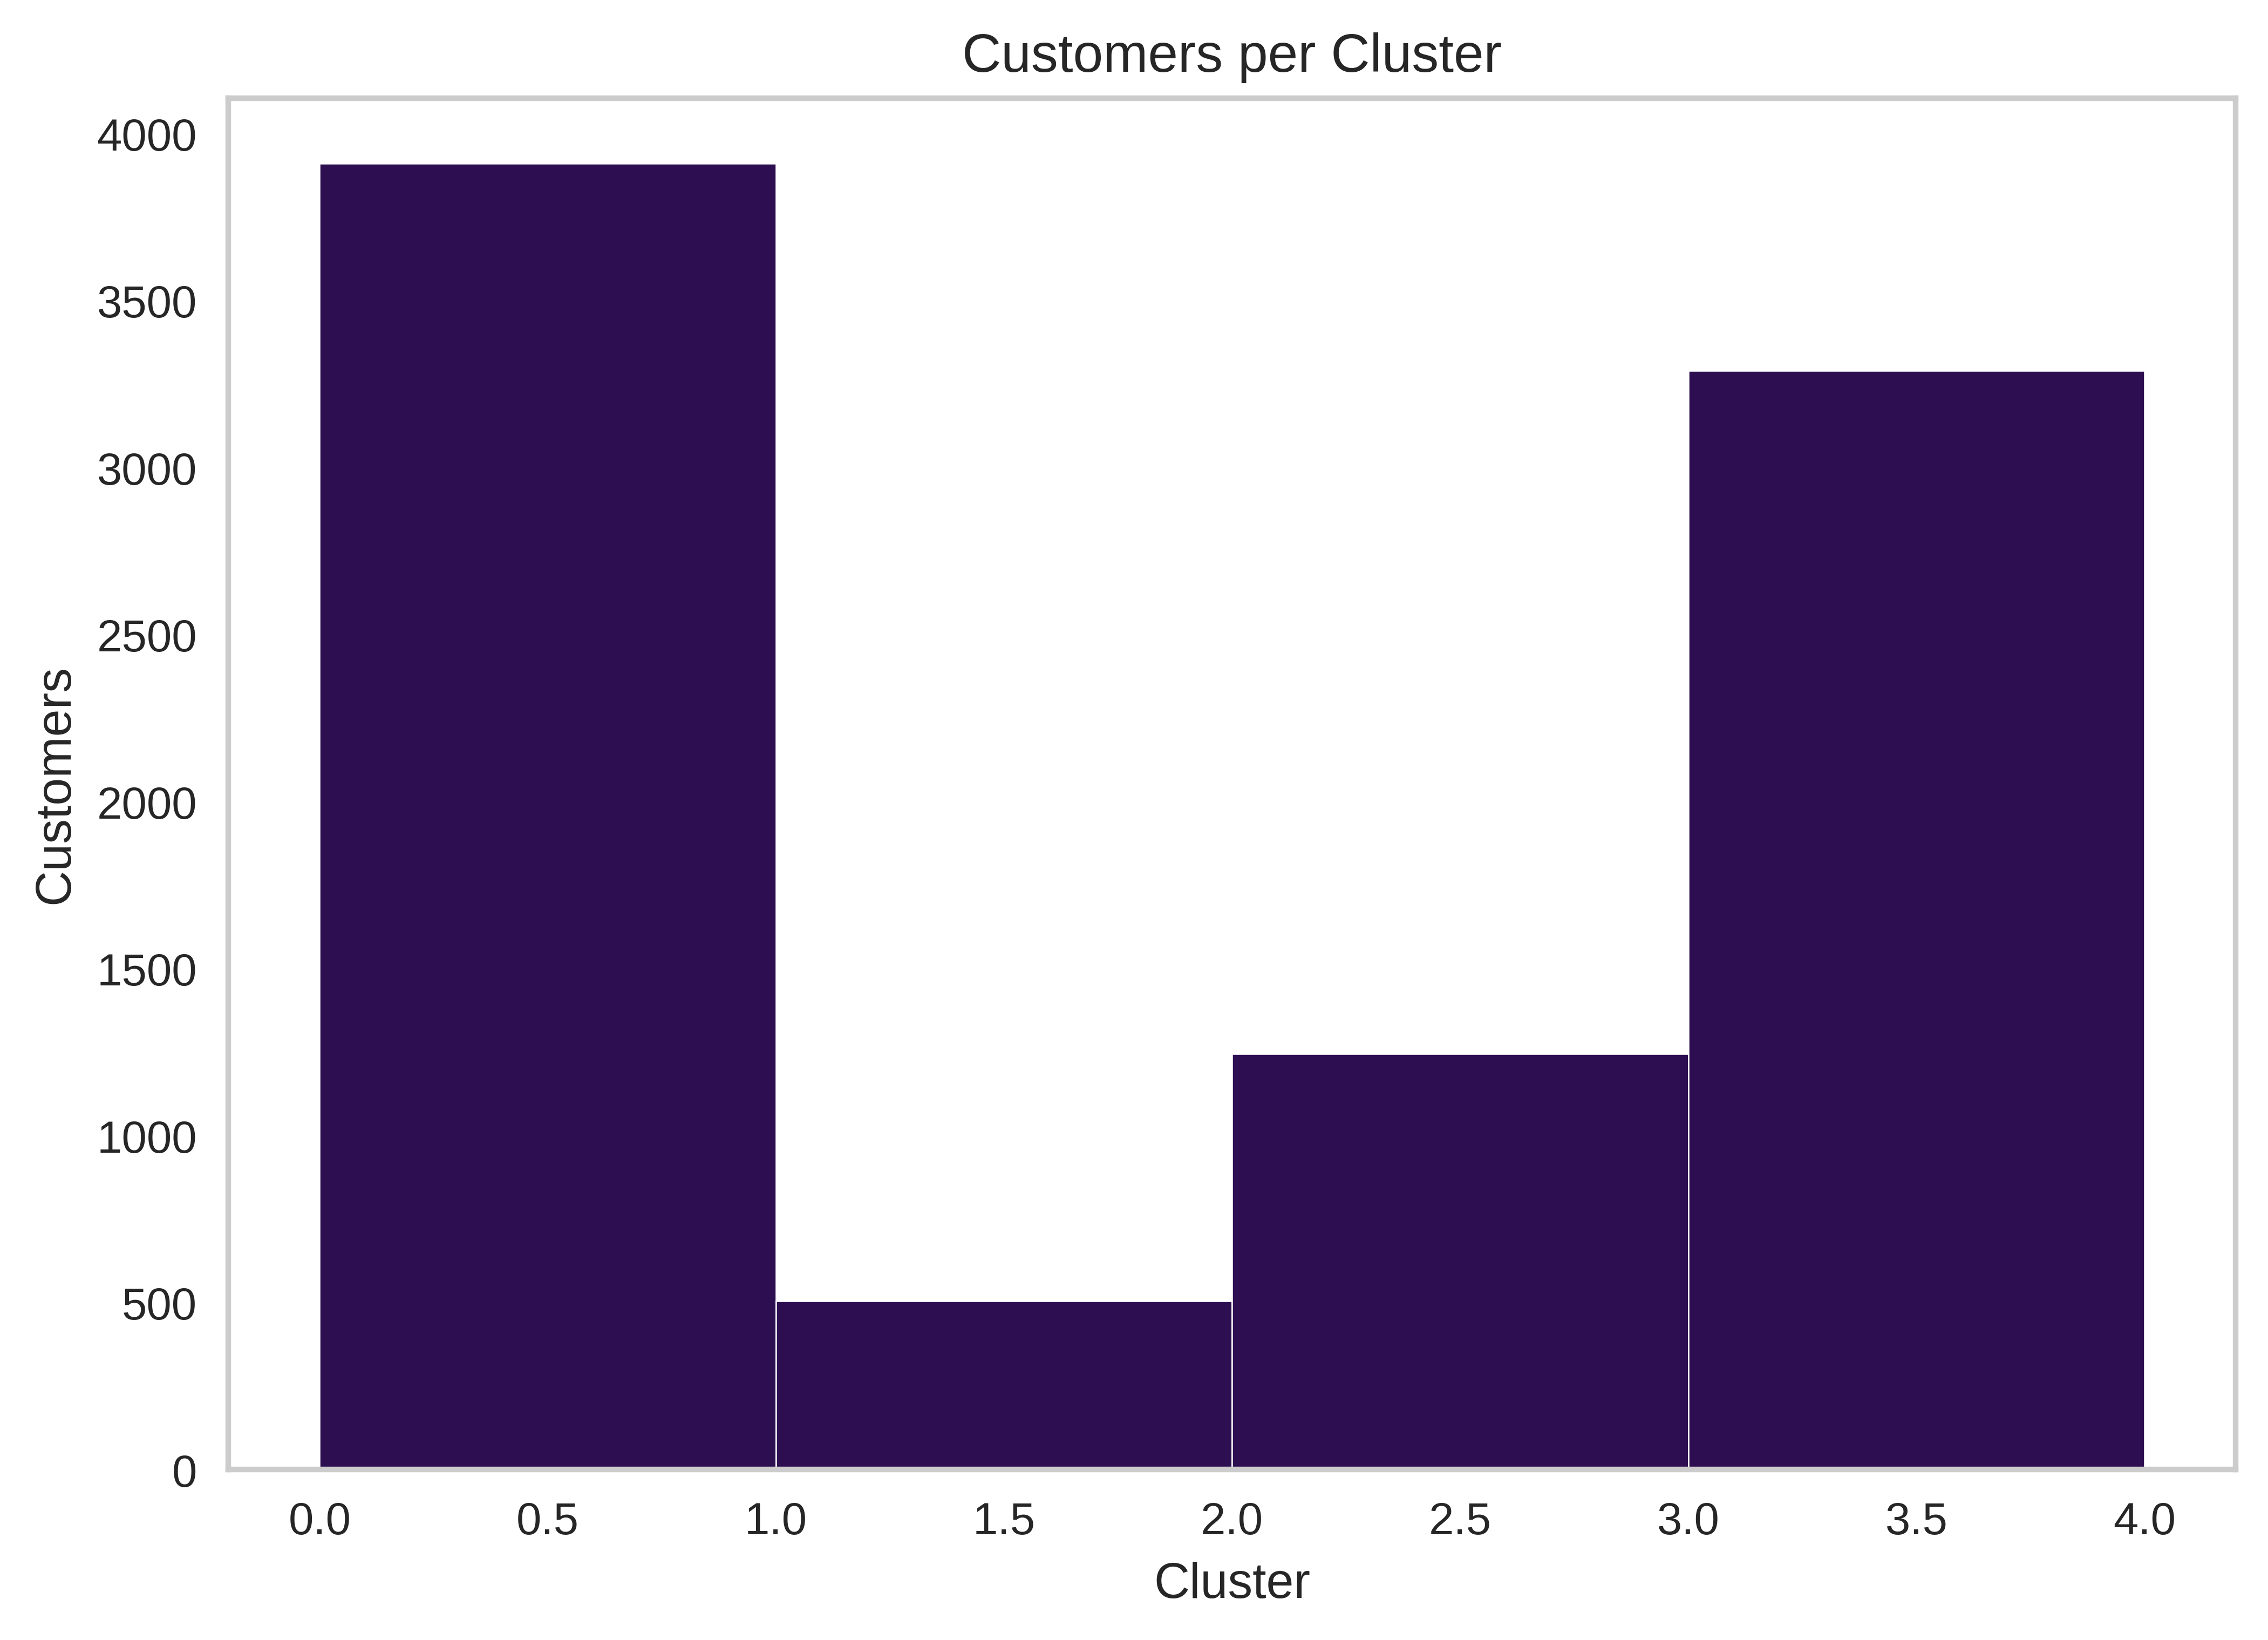

In [82]:
n_clusters = 4

clustering = KMeans(n_clusters=n_clusters,
                    random_state=42,
                    max_iter=500)

cluster_labels = clustering.fit_predict(X)

# plot cluster sizes
colors = '#2D0F51'

plt.hist(cluster_labels, bins=range(n_clusters+1), color=colors)
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.grid(False)
plt.show()

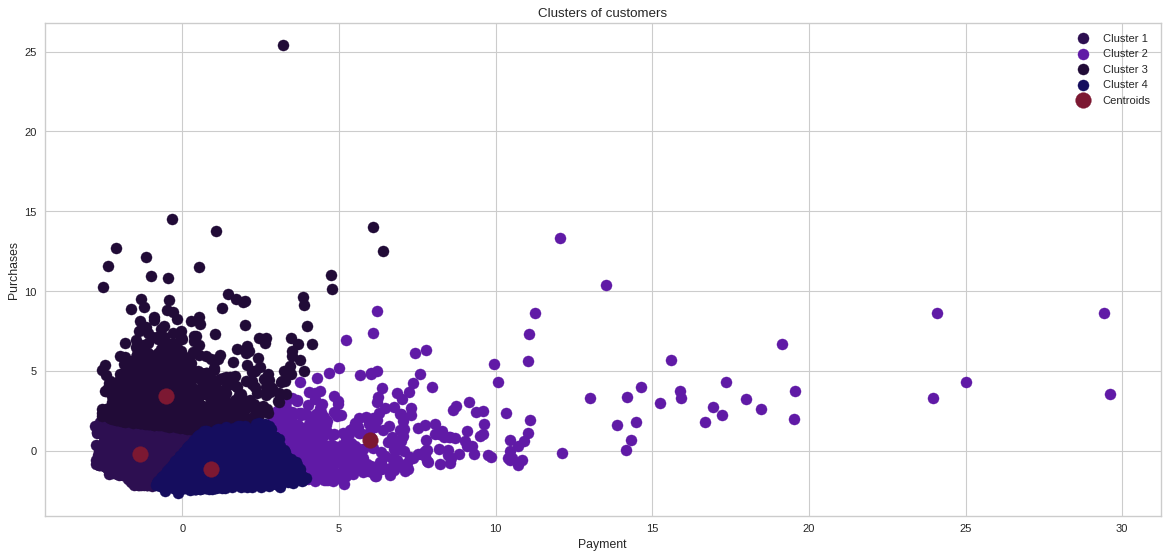

In [93]:
n_clusters = 4

# Instantiate and fit the KMeans clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=42, max_iter=500)
cluster_labels = kmeans.fit_predict(X)

# Define colors for the clusters
cluster_colors = ['#2D0F51', '#601AA6', '#210B37', '#150D5E']

# Create a scatter plot for each cluster
plt.figure(figsize=(18, 8), dpi=80)
for i in range(n_clusters):
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], s=100, c=cluster_colors[i], label=f'Cluster {i + 1}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='#7C1832', label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Payment')
plt.ylabel('Purchases')
plt.legend()
plt.show()


In [95]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print(clr.start+'.: Evaluate Clustering Quality :.'+clr.end)
    print(clr.color+'*' * 34+clr.end)
    print('.: Davies-Bouldin Index: '+clr.start, db_index)
    print(clr.end+'.: Silhouette Score: '+clr.start, s_score)
    print(clr.end+'.: Calinski Harabasz Index: '+clr.start, ch_index)
    return db_index, s_score, ch_index

# --- Evaluate K-Means Cluster Quality ---
db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(X, cluster_labels)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  0.801
.: Silhouette Score:  0.408
.: Calinski Harabasz Index:  5823.691


In [100]:
# --- Add K-Means Prediction to Data Frame ----
df['cluster_result'] = cluster_labels+1
df['cluster_result'] = 'Cluster '+df['cluster_result'].astype(str)

# --- Calculationg Overall Mean from Current Data Frame ---
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df.describe().loc[['mean']].T

# --- Summarize Mean of Each Clusters --- 
df_cluster_summary = df.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient(cmap='YlOrBr')

### **Another quick summary**

- **Cluster 1**  *(Nasabah baru)*: Dapat dilihat dari purchase frequency ataupun balance yang ada masih tergolong kecil. Dapat diasumsikan bahwa nasabah hanya menggunakan kartu kredit untuk proses penarikan tunai dengan frekuensi yang cukup.

- **Cluster 2**  *(Nasabah aktif)* : Dari segi balance freq, total purchases, serta credit limit ketiga variabel ini memiliki nilai yang paling besar dibandingkan pada cluster yang lain

- **Cluster 3** *(Pengguna Kartu Kredit Penarikan Tunai)* : memiliki balance yang besar namun dari segi purchase frequency tergolong kecil. Nasabah ini biasa menggunakan kartu kredit untuk melakukan pengambilan uang tunai

- **Cluster 4**  *(Installment Users)*: nasabah menggunakan kredit untuk penggunaan instalasi. Nasabah dalam cluster ini sangat jarang melakukan pembayaran dan pembayaran tunai di muka serta memiliki frekuensi dan jumlah pembayaran tunai di muka yang relatif kecil

## Marketing Strategy Suggestion

- Untuk **cluster 1** dapat diberikan sebuah pendekatan khusus agar nanti memiliki oportunitas upgrade ke dalam produk kredit terbaru. 

- **Cluster 2** merupakan target utama dalam audience marketing. 
- **Cluster 3** bank dapat memberikan offer khusus dalam pengambilan uang tunai. seperti program pylater dengan kerjasama pihak ketiga atau pinjaman pribadi yang diberikan oleh bank.

- **Cluster 4** untuk nasabah yang berfokuskan pada instalasi, bank dapat memberikan program khusus dikarenakan cluster 3 sangat memiliki ketertarikan dalam melakukan transaksi.